In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import warnings

In [2]:
# Loading the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Normalize the image data to range between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Reshape the data to fit the model input requirements
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [6]:
# Convert the labels into one-hot vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [7]:
# Design a convolutional neural network (CNN) suitable for classifying the ima
model = Sequential([
 Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
 MaxPooling2D((2, 2)),
 Conv2D(64, (3, 3), activation='relu'),
 MaxPooling2D((2, 2)),
 Flatten(),
 Dense(128, activation='relu'),
 Dense(10, activation='softmax')
])

In [9]:
model.compile(
    optimizer = Adam(),
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
history = model.fit(x_train, y_train, 
                    epochs = 10,
                    batch_size = 64,
                    verbose=1,
                    validation_split = 0.2
            )

Epoch 1/10
750/750 [==============================] - 33s 41ms/step - loss: 0.5052 - accuracy: 0.8169 - val_loss: 0.3709 - val_accuracy: 0.8697
Epoch 2/10
750/750 [==============================] - 30s 39ms/step - loss: 0.3319 - accuracy: 0.8824 - val_loss: 0.3318 - val_accuracy: 0.8777
Epoch 3/10
750/750 [==============================] - 30s 40ms/step - loss: 0.2854 - accuracy: 0.8950 - val_loss: 0.3143 - val_accuracy: 0.8819
Epoch 4/10
750/750 [==============================] - 30s 40ms/step - loss: 0.2547 - accuracy: 0.9084 - val_loss: 0.2746 - val_accuracy: 0.9031
Epoch 5/10
750/750 [==============================] - 28s 37ms/step - loss: 0.2295 - accuracy: 0.9158 - val_loss: 0.2627 - val_accuracy: 0.9089
Epoch 6/10
750/750 [==============================] - 27s 36ms/step - loss: 0.2090 - accuracy: 0.9227 - val_loss: 0.2596 - val_accuracy: 0.9064
Epoch 7/10
750/750 [==============================] - 29s 39ms/step - loss: 0.1904 - accuracy: 0.9296 - val_loss: 0.2494 - val_accuracy:

In [14]:
# Evaluate the model's performance on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test)


313/313 [==============================] - 2s 6ms/step - loss: 0.2618 - accuracy: 0.9122


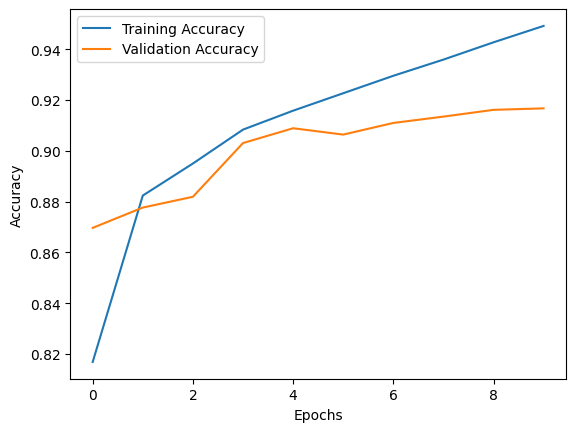

In [15]:
# Plot the training and validation accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

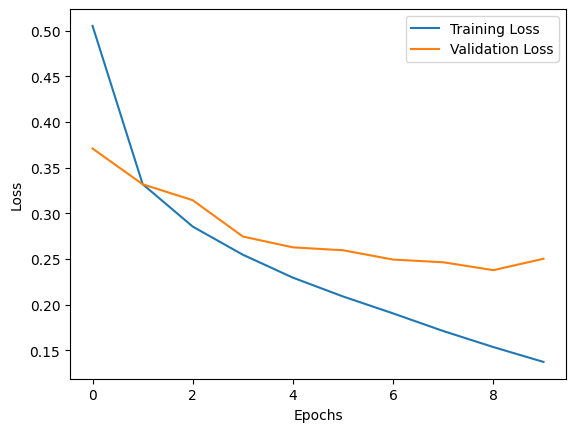

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 133ms/step


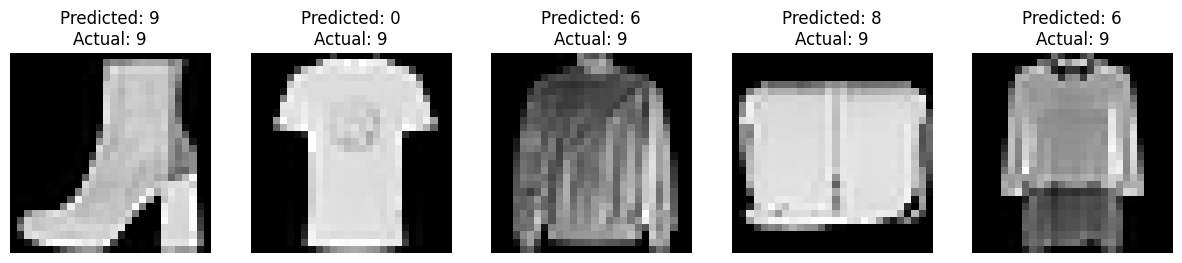

In [20]:
# Choose a few random test images
num_samples = 5
random_indices = np.random.choice(len(x_test), num_samples)
# Make predictions on the selected test images
predictions = model.predict(x_test[random_indices])
# Visualize the sample images with their predicted and actual labels
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
 plt.subplot(1, num_samples, i + 1)
 plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
 plt.title(f"Predicted: {np.argmax(predictions[i])}\nActual: {np.argmax(y_test)}")
 plt.axis('off')
plt.show()